
### <font color = "darkblue">Updates to Assignment</font>

#### If you were working on the older version:
* Please click on the "Coursera" icon in the top right to open up the folder directory.  
* Navigate to the folder: Week 3/ Planar data classification with one hidden layer.  You can see your prior work in version 6b: "Planar data classification with one hidden layer v6b.ipynb"

#### List of bug fixes and enhancements
* Clarifies that the classifier will learn to classify regions as either red or blue.
* compute_cost function fixes np.squeeze by casting it as a float.
* compute_cost instructions clarify the purpose of np.squeeze.
* compute_cost clarifies that "parameters" parameter is not needed, but is kept in the function definition until the auto-grader is also updated.
* nn_model removes extraction of parameter values, as the entire parameter dictionary is passed to the invoked functions.

# Planar data classification with one hidden layer

Welcome to your week 3 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation


## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [ ]:
X, Y = load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

In [ ]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

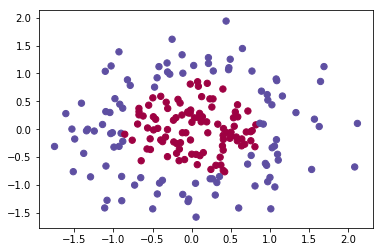

In [3]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)
I have m = 200 training examples!


**Expected Output**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 53 % (percentage of correctly labelled datapoints)


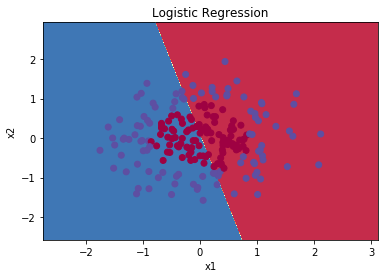

In [6]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 47% </td> 
  </tr>
  
</table>


**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

**Exercise**: Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [7]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Expected Output** (these are not the sizes you will use for your network, they are just used to assess the function you've just coded).

<table style="width:20%">
  <tr>
    <td>**n_x**</td>
    <td> 5 </td> 
  </tr>
  
    <tr>
    <td>**n_h**</td>
    <td> 4 </td> 
  </tr>
  
    <tr>
    <td>**n_y**</td>
    <td> 2 </td> 
  </tr>
  
</table>

### 4.2 - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [9]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


**Expected Output**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>



### 4.3 - The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [11]:
def relu(X):
    return np.maximum(0, X)

In [12]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [13]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.262818640198 0.091999045227 -1.30766601287 0.212877681719


**Expected Output**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td> 
  </tr>
</table>

Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [14]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    print("Shape of Y: " + str(Y.shape))
    print("Shape of A2: " + str(A2.shape))
    logprobs = np.dot(np.log(A2), Y.T) + np.dot(np.log(1 - A2), (1 - Y).T)
    #logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = (-1/m) * logprobs[0,0]
    #cost = (-1/m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    ### END CODE HERE ###
    print(cost)
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [15]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.693058761039
cost = 0.6930587610394646


**Expected Output**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [16]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 =  (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [17]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Expected output**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>  

**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">



In [18]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


**Expected Output**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>  

### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [20]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [21]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.692739247723
Cost after iteration 0: 0.692739
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.663117437671
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.645228010084
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.62604138286
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.587902044587
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.506110271419
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.377493546481
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.249677538347
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.163351462905
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.113632011378
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0844874940687
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0661952733843
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0539276282836
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0452407396088
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0388175006848
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0339010624212
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.0300312410717
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.02

Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00068842880328
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000686234672455
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000684054379394
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000681887794104
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000679734788208
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000677595234927
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000675469009049
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000673355986908
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00067125604636
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000669169066758
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000667094928932
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000665033515163
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000662984709166
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000660948396062
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000658924462362
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000656912795943
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00065491328603
Shape of Y: (1, 3)
Shape of A2: (1

0.000261511017744
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000261190156616
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000260870078327
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000260550780024
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000260232258865
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000259914512023
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000259597536684
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000259281330048
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000258965889329
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000258651211753
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000258337294561
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000258024135006
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000257711730355
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000257400077887
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000257089174896
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000256779018687
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000256469606579
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000256160935904
Shape of Y: (

Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00016150069372
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000161377787175
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000161255066891
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000161132532448
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000161010183423
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160888019397
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160766039952
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160644244669
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160522633134
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160401204931
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160279959646
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160158896869
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000160038016186
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000159917317189
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00015979679947
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000159676462619
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000159556306233
Shape of Y: (1, 3)
Shape of A2: (

Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000109030229173
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108974055031
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108917938571
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108861879706
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108805878346
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108749934404
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108694047791
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00010863821842
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108582446203
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108526731051
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108471072878
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108415471597
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00010835992712
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00010830443936
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108249008232
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.000108193633647
Shape of Y: (1, 3)
Shape of A2: (1, 3)
0.00010813831552
Shape of Y: (1, 3)
Shape of A2: (1,

Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.27692431255e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.27368167893e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.27044157844e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.26720400813e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.26396896501e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.26073644614e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.25750644859e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.2542789694e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.25105400561e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.24783155432e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.24461161258e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.24139417745e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.23817924604e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.23496681541e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.23175688265e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.22854944485e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
8.22534449911e-05
Shape of Y: (1, 3)
Shape of A2: 

6.66866233768e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.66655499834e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.66444898731e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.66234430335e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.66024094518e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.65813891156e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.65603820126e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.65393881302e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.65184074559e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.64974399772e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.64764856818e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.64555445572e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.64346165911e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.64137017709e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.63928000844e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.63719115193e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.63510360631e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
6.63301737037e-05
Shape of Y: (

Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.58286876046e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.58139052656e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.57991307359e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.5784364009e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.57696050788e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.57548539392e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.5740110584e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.5725375007e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.57106472023e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56959271634e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56812148843e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56665103589e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56518135811e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56371245448e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56224432438e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.56077696721e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
5.55931038236e-05
Shape of Y: (1, 3)
Shape of A2: (1

Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79957151463e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79847825051e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79738548332e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79629321271e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79520143837e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79411015994e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79301937708e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79192908948e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.79083929677e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78974999865e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78866119475e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78757288474e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78648506829e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78539774508e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78431091476e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78322457699e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.78213873145e-05
Shape of Y: (1, 3)
Shape of A2:

Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20873209646e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20789097262e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20705018428e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20620973122e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20536961326e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20452983017e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20369038178e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20285126788e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20201248827e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20117404275e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.20033593112e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.19949815317e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.19866070872e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.19782359757e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.1969868195e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.19615037434e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
4.19531426187e-05
Shape of Y: (1, 3)
Shape of A2: 

Shape of A2: (1, 3)
3.74989163178e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.7492236085e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74855582277e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74788827442e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74722096337e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74655388946e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74588705258e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74522045262e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74455408942e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74388796287e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74322207285e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74255641921e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74189100186e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74122582066e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.74056087547e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.73989616619e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.73923169266e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.7385674547

Shape of A2: (1, 3)
3.38820907447e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38766349372e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38711808833e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38657285823e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38602780333e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38548292354e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38493821879e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38439368897e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38384933403e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38330515385e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38276114838e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38221731751e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38167366116e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38113017926e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38058687171e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.38004373845e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.37950077937e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.378957994

Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09506912808e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09461372097e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09415844763e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09370330801e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09324830204e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09279342967e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09233869084e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09188408548e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09142961354e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09097527496e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09052106969e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.09006699766e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.08961305881e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.08915925309e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.08870558044e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.0882520408e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
3.0877986341e-05
Shape of Y: (1, 3)
Shape of A2: (

2.83243094698e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.83204943346e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.83166802252e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.83128671414e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.83090550827e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.83052440488e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.83014340392e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82976250535e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82938170911e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.8290010152e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82862042355e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82823993412e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82785954687e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82747926177e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82709907877e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82671899783e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82633901892e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.82595914197e-05
Shape of Y: (1

Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.63009690392e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62976786952e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62943891731e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62911004725e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62878125933e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.6284525535e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62812392972e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62779538799e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62746692825e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62713855049e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62681025468e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62648204077e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62615390874e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62582585857e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62549789022e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62517000365e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.62484219884e-05
Shape of Y: (1, 3)
Shape of A2: 

Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44187163837e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44158794661e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44130432066e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44102076049e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44073726608e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44045383742e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.44017047448e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43988717722e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43960394565e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43932077972e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43903767943e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43875464473e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43847167561e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43818877206e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43790593404e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43762316154e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.43734045452e-05
Shape of Y: (1, 3)
Shape of A2:

Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28544724829e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28519868744e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28495018057e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28470172767e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28445332871e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28420498368e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28395669255e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28370845531e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28346027195e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28321214246e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.2829640668e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28271604497e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28246807693e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28222016269e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28197230221e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.28172449549e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.2814767425e-05
Shape of Y: (1, 3)
Shape of A2: (

2.16845054795e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16822674882e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16800299581e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16777928892e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16755562812e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16733201339e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16710844475e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16688492214e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16666144557e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16643801504e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16621463052e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16599129197e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16576799943e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16554475285e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16532155222e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16509839752e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.16487528876e-05
Shape of Y: (1, 3)
Shape of A2: (1, 3)
2.1646522259e-05
Shape of Y: (1

**Expected Output**:

<table style="width:90%">

<tr> 
    <td> 
        **cost after iteration 0**
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  
</table>  

### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [22]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

In [23]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


**Expected Output**: 


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693149041345
Cost after iteration 0: 0.693149
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693148654123
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693148269312
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.6931478864
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693147504882
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693147124253
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693146744014
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693146363666
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693145982712
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693145600655
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693145217
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693144831248
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693144442903
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693144051463
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693143656425
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.693143257285
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.507877928804
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.506873476648
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.505908786678
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.50498167224
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.504090060324
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.503231989115
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.502405604908
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.50160915852
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.500841001352
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.500099581174
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.49938343776
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.498691198414
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.49802157347
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.497373351808
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.496745396434
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.496136640141
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.495546081301
Shape of Y: (1, 20

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115682247817
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115576917143
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115471926726
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115367273342
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115262953794
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115158964916
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.115055303569
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114951966645
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114848951062
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114746253767
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114643871733
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114541801962
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.11444004148
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114338587344
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114237436634
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114136586456
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.114036033944
Shape of Y: (1,

Shape of A2: (1, 200)
0.0844588908731
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0844128719351
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.084366918845
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0843210315156
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0842752098602
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0842294537931
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0841837632293
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0841381380843
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0840925782746
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0840470837175
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0840016543306
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0839562900328
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0839109907431
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0838657563817
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0838205868691
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0837754821268
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0837304420766
Shape of Y: (1, 200

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0700383244529
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0700134897881
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0699886874053
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0699639172279
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0699391791797
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0699144731843
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0698897991661
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0698651570491
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.069840546758
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0698159682175
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0697914213525
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0697669060882
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0697424223501
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0697179700637
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.069693549155
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0696691595498
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0696448011746

0.0775103252833
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0766130465289
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.077504577537
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0766080749237
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0774988077177
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0766031019941
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0774930148655
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0765981269603
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0774871980333
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0765931490525
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0774813562865
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0765881675102
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.077475488702
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0765831815818
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0774695943686
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0765781905244
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0774636723859
Shape of Y: (1, 200)
Shape of A2: (1, 200)

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0742495624348
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0743041334396
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0742259023714
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0742739596102
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0742020204519
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0742435516996
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.074177914965
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0742129084743
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0741535842343
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0741820287478
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0741290266215
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0741509113838
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0741042405296
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0741195552995
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0740792244058
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0740879594689
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.074053976745

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0673397946765
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0683192403436
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0673280155792
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0683106834125
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0673162795273
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.068302172293
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0673045854944
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0682937059709
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0672929324803
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.068285283457
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0672813195103
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0682769037867
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0672697456349
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0682685660193
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0672582099288
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0682602692374
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0672467114907

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667415459854
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0649209647199
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667358561826
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0649117012851
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.066730171364
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0649024429423
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667244915253
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0648931896974
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667188166623
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0648839415564
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667131467712
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0648746985253
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667074818478
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0648654606102
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0667018218883
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0648562278171
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.066696166889

0.062983208515
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655829588845
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629752077064
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655783417519
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629672127931
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655737291866
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629592237743
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655691211862
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629512406493
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.065564517748
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629432634174
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655599188692
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629352920776
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655553245471
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629273266292
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0655507347791
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0629193670712
Shape of Y: (1, 200)
Shape of A2: (1, 200)

Shape of A2: (1, 200)
0.0613677355185
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0646748820677
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613609600239
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0646711776441
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613541896617
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0646674769015
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613474244267
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.064663779835
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613406643138
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0646600864397
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.061333909318
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0646563967106
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.061327159434
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.064652710643
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613204146568
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0646490282319
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613136749813
Shape of Y: (1, 200)
S

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.059939851428
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0639130367892
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0599341158601
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0639100491502
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.059928384255
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0639070641114
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0599226566081
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0639040816684
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0599169329146
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.063901101817
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0599112131698
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.063898124553
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0599054973692
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0638951498721
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0598997855079
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.06389217777
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0598940775814
Sha

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634314613589
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589976717292
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634288652143
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589925601355
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634262710219
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589874517779
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634236787784
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589823466525
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634210884806
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589772447559
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634185001252
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589721460843
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634159137091
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589670506342
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0634133292291
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0589619584019
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.06341074668

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578561605196
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628555873806
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578517335659
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628533811847
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578473091267
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628511763193
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578428871996
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628489727823
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.057838467782
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628467705719
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578340508716
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628445696859
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578296364659
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628423701225
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0578252245626
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0628401718795
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.057820815159

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.062430544574
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569980190214
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624285734863
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569940615483
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624266033945
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569901061615
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624246342973
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569861528594
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624226661935
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.05698220164
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624206990817
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569782525016
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624187329607
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569743054425
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.062416767829
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0569703604608
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0624148036854
S

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620223716391
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561818207921
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620205903612
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561782799308
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620188098439
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561747408198
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620170300863
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561712034578
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620152510876
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561676678435
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620134728468
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561641339755
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.062011695363
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561606018526
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0620099186356
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0561570714733
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.062008142663

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616785519945
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0555036072513
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616769078986
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.055500393313
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616752644148
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0554971808851
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616736215424
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0554939699665
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616719792809
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0554907605561
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616703376296
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0554875526528
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616686965879
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0554843462556
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0616670561552
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0554811413634
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.061665416330

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547848173336
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.06130477041
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.054781932374
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613032558886
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547790486995
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613017418552
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547761663092
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0613002283094
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547732852024
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0612987152508
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.054770405378
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0612972026789
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547675268354
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0612956905933
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547646495736
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0612941789936
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0547617735918
S

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0609656417672
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0541456659625
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.060964229814
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.054143058846
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.060962818261
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0541404528344
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0609614071078
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0541378479272
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.060959996354
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0541352441235
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0609585859995
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0541326414227
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0609571760437
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0541300398241
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0609557664865
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.054127439327
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0609543573275
Sh

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.060654804522
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535809059439
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606534757287
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535785327302
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606521472705
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535761604761
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606508191471
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535737891808
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606494913582
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.053571418844
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606481639038
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535690494648
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606468367834
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535666810429
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606455099968
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0535643135775
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0606441835438

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.053054878582
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.060353760789
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530527131499
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.060352503814
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530505485524
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0603512471224
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530483847892
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0603499907139
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530462218598
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0603487345882
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530440597637
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0603474787452
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530418985004
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0603462231848
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530397380693
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0603449679066
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0530375784701


Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600657649835
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525659617641
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600645695833
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525639804053
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600633744253
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525619997742
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600621795093
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525600198705
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600609848351
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525580406937
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600597904026
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525560622433
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600585962117
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525540845191
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0600574022623
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0525521075205
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.06005620855

Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0521140357913
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0597866216463
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0521122165103
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0597854800202
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0521103978657
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.059784338603
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0521085798571
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0597831973946
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0521067624842
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0597820563949
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0521049457466
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0597809156037
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.052103129644
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.059779775021
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.052101314176
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0597786346465
Shape of Y: (1, 200)
Shape of A2: (1, 200)
0.0520994993422
S

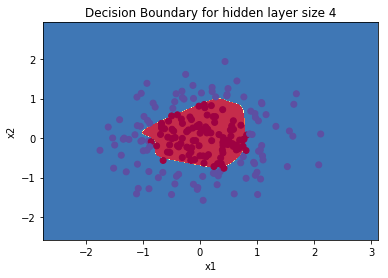

In [24]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [25]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 97%


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

In [ ]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticeable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

**Optional questions**:

**Note**: Remember to submit the assignment by clicking the blue "Submit Assignment" button at the upper-right. 

Some optional/ungraded questions that you can explore if you wish: 
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part 5 below!)

<font color='blue'>
**You've learnt to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varying the hidden layer size, including overfitting.

Nice work! 

## 5) Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

In [ ]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Congrats on finishing this Programming Assignment!

Reference:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/